In [2]:
library('tidyverse')
ds = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
ds %>% print
df = ds


── Column specification ────────────────────────────────────────────────────────
cols(
  YEAR = col_double(),
  GoogleKnowlege_Occupation = col_character(),
  Show = col_character(),
  Group = col_character(),
  Raw_Guest_List = col_character()
)




# A tibble: 2,693 x 5
    YEAR GoogleKnowlege_Occupation Show    Group    Raw_Guest_List  
   <dbl> <chr>                     <chr>   <chr>    <chr>           
 1  1999 actor                     1/11/99 Acting   Michael J. Fox  
 2  1999 Comedian                  1/12/99 Comedy   Sandra Bernhard 
 3  1999 television actress        1/13/99 Acting   Tracey Ullman   
 4  1999 film actress              1/14/99 Acting   Gillian Anderson
 5  1999 actor                     1/18/99 Acting   David Alan Grier
 6  1999 actor                     1/19/99 Acting   William Baldwin 
 7  1999 Singer-lyricist           1/20/99 Musician Michael Stipe   
 8  1999 model                     1/21/99 Media    Carmen Electra  
 9  1999 actor                     1/25/99 Acting   Matthew Lillard 
10  1999 stand-up comedian         1/26/99 Comedy   David Cross     
# … with 2,683 more rows


In [3]:
ds_group_new = ds %>%
mutate(Group_new = ifelse(Group %in% c("Acting", "Comedy", "Media", "media", "Musician"), "Media/Arts", 
                ifelse(Group %in% c("Politician", "Political Aide", "Military", "Consultant", "Advocacy"), "Government", "Other"))) %>% 
filter(Group_new != "Other")

ds_group_new %>% head


YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,Group_new
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1999,actor,1/11/99,Acting,Michael J. Fox,Media/Arts
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,Media/Arts
1999,television actress,1/13/99,Acting,Tracey Ullman,Media/Arts
1999,film actress,1/14/99,Acting,Gillian Anderson,Media/Arts
1999,actor,1/18/99,Acting,David Alan Grier,Media/Arts
1999,actor,1/19/99,Acting,William Baldwin,Media/Arts


In [36]:
top_10 = ds_group_new %>%
filter(Group_new == "Media/Arts") %>% 
count(Raw_Guest_List) %>%
arrange(-n) %>%
head(10)

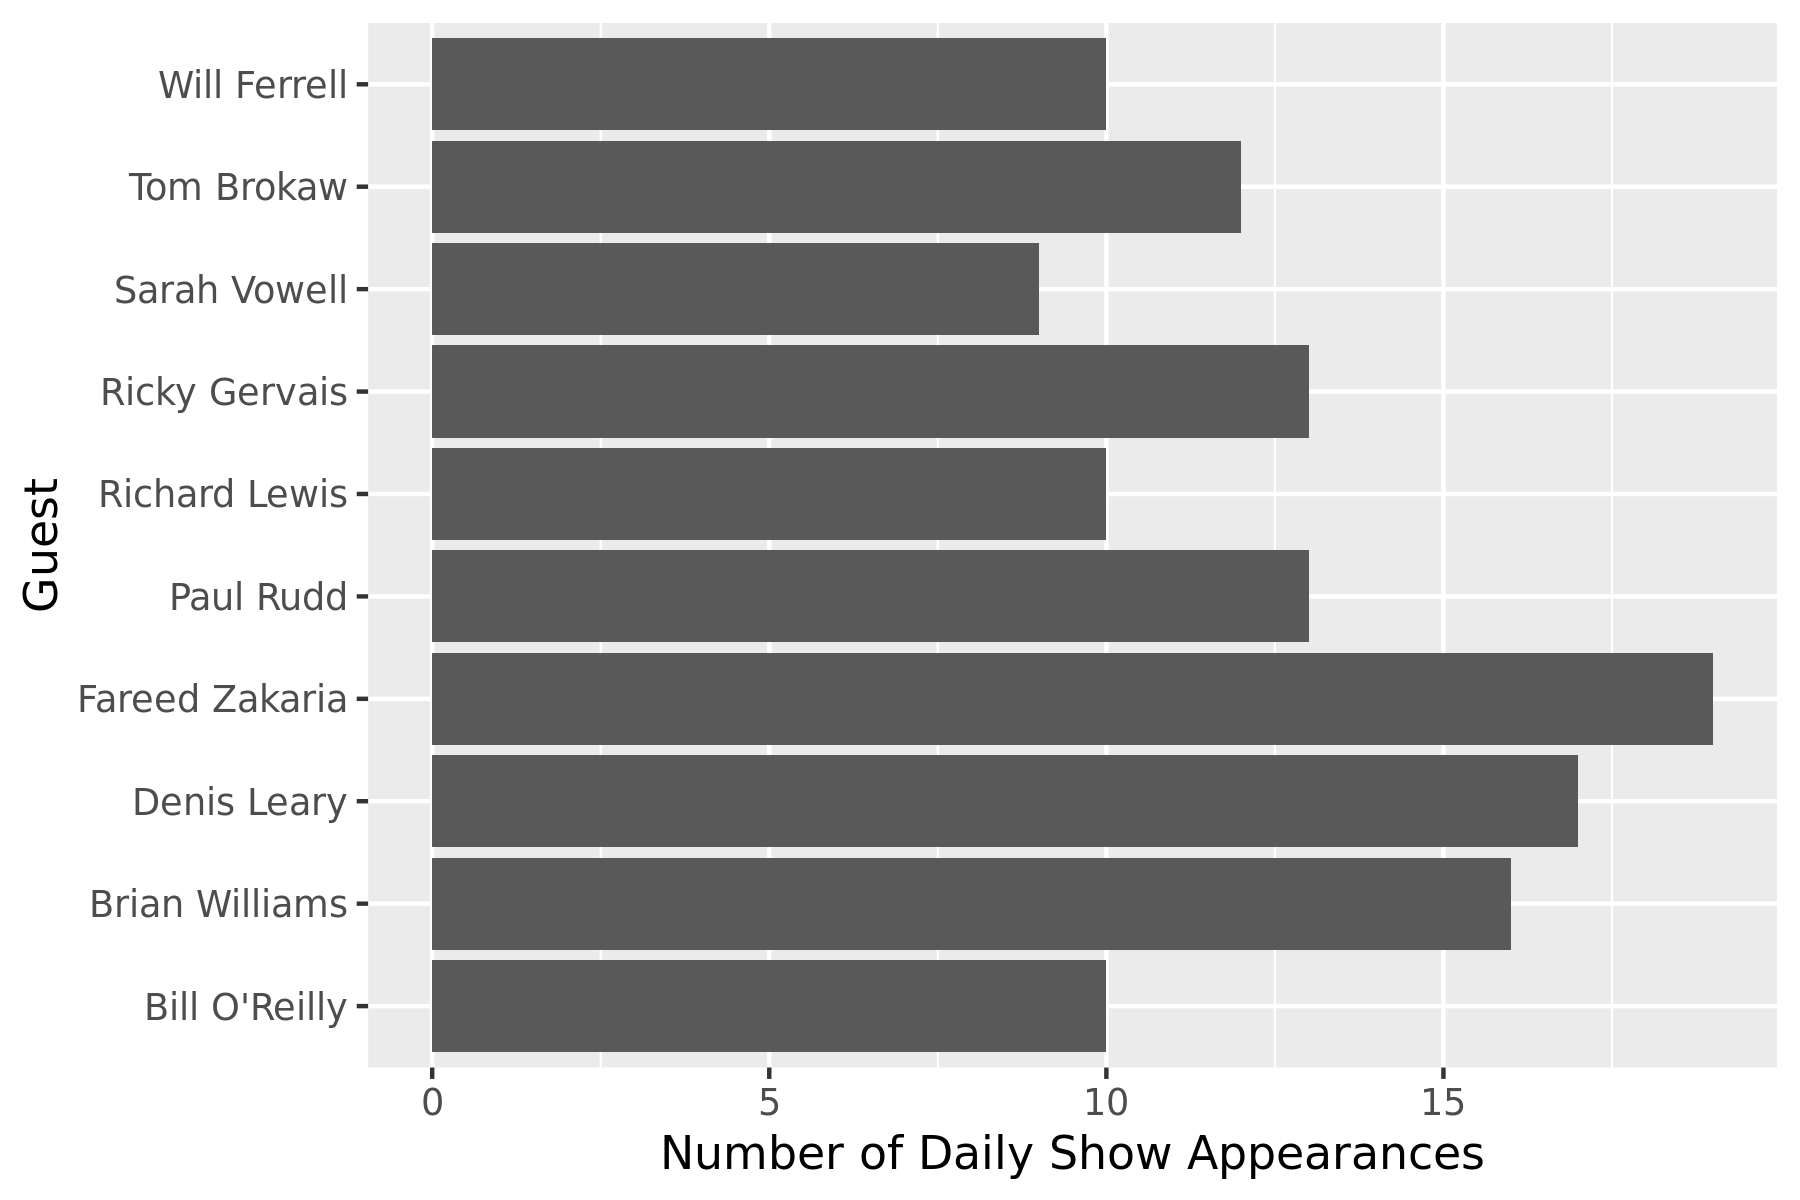

In [53]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)
p = ggplot(top_10, aes(x = Raw_Guest_List, y = n))
p = p + geom_col()
p = p + coord_flip()
p = p + labs(y = "Number of Daily Show Appearances", x = "Guest")
p

In [19]:
top_5 = ds_group_new %>%
filter(Group_new == "Government") %>% 
count(Raw_Guest_List) %>%
arrange(-n) %>%
head(5)


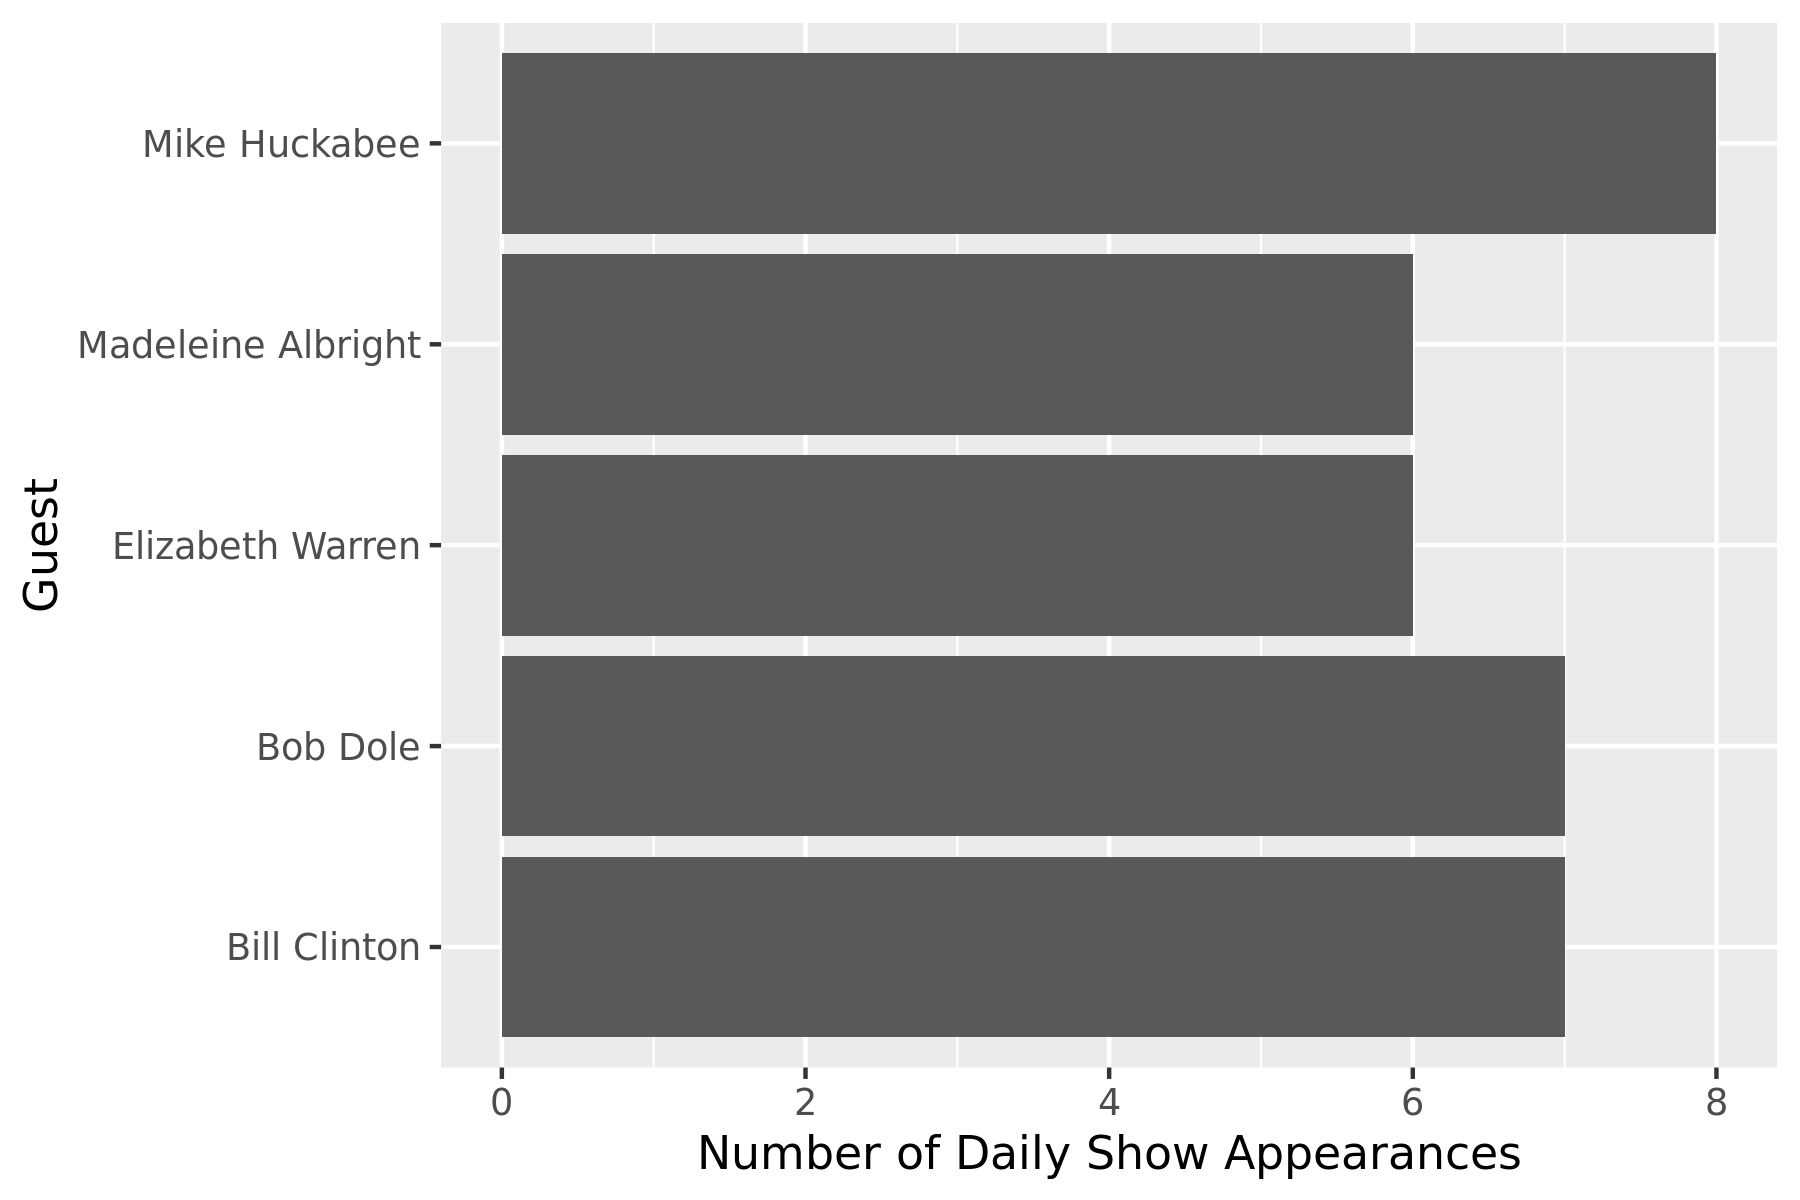

In [50]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)
p = ggplot(top_5, aes(x = Raw_Guest_List, y = n))
p = p + geom_col()
p = p + coord_flip()
p = p + labs(y = "Number of Daily Show Appearances", x = "Guest")
p

Let's look at the percentage of Media guests vs government guests over the years. 

In [7]:
ds_group_new_percent = ds_group_new %>% group_by(YEAR, Group_new) %>% count %>% group_by(YEAR) %>% mutate(percent = n/sum(n) * 100)
ds_group_new_percent %>% head

YEAR,Group_new,n,percent
<dbl>,<chr>,<int>,<dbl>
1999,Government,2,1.226994
1999,Media/Arts,161,98.773006
2000,Government,15,9.316770
2000,Media/Arts,146,90.683230
2001,Government,4,2.684564
2001,Media/Arts,145,97.315436


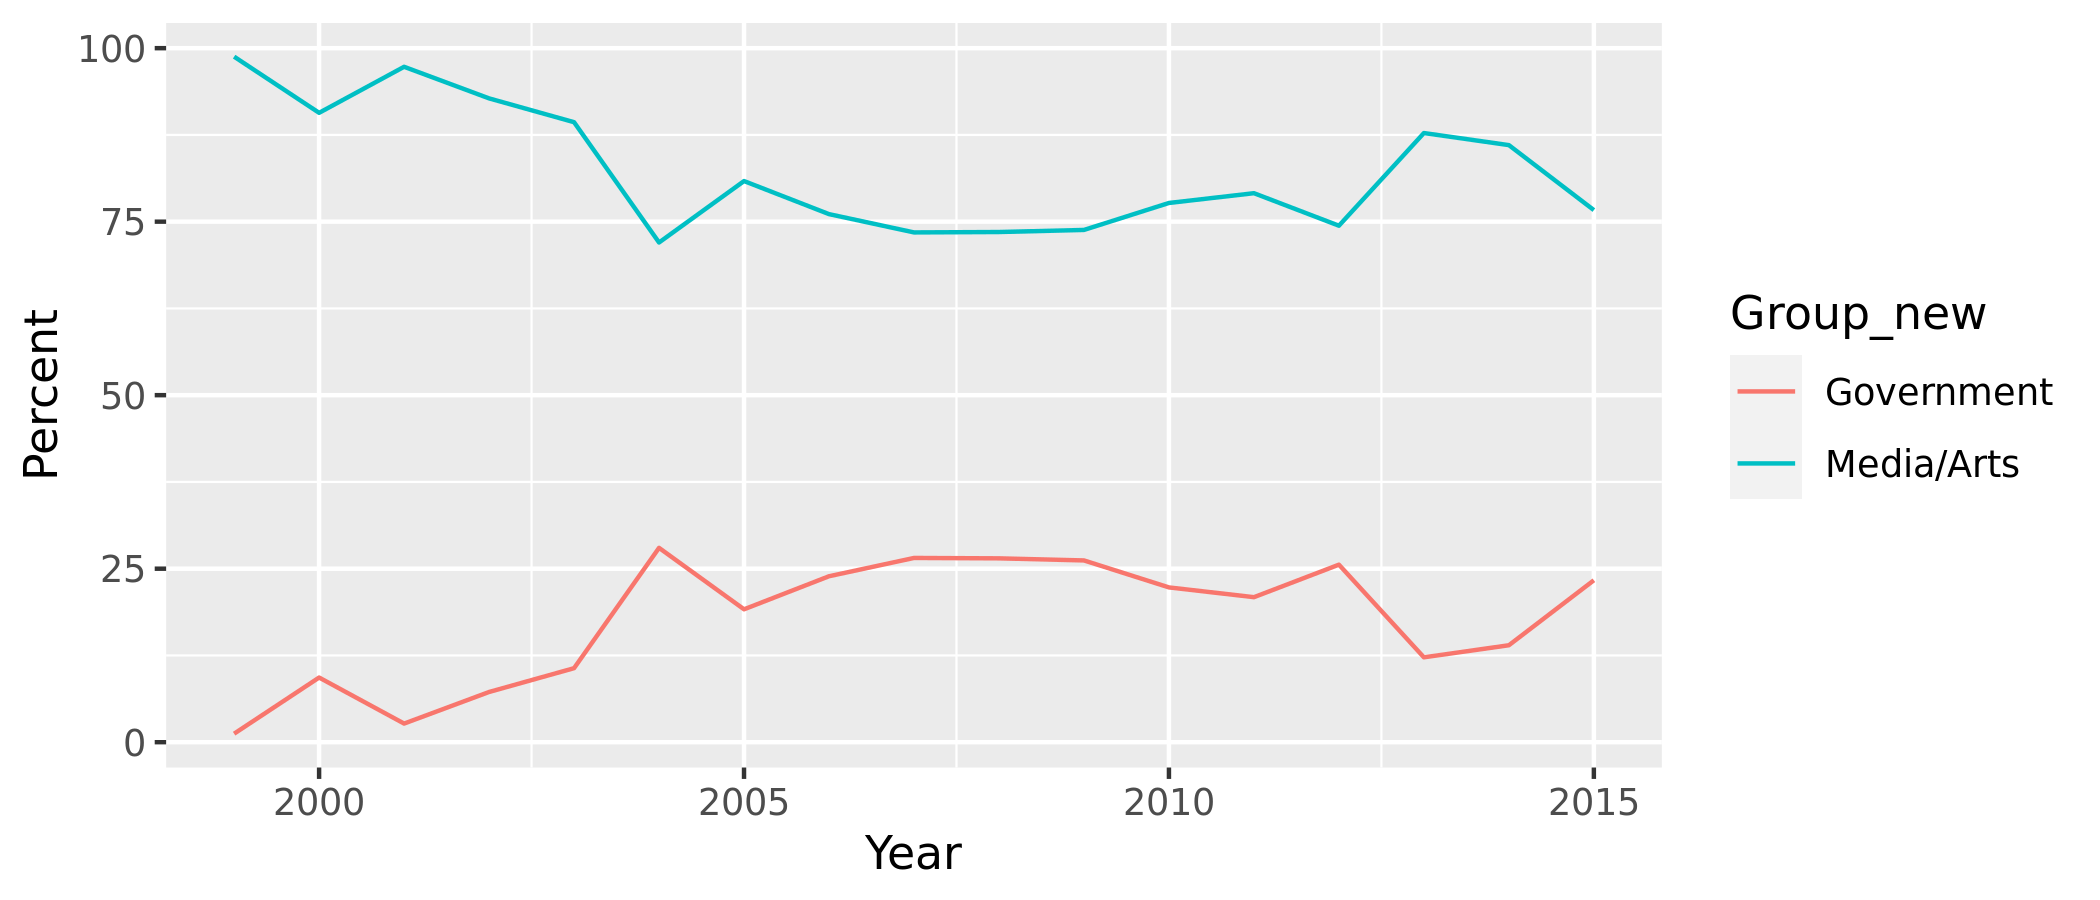

In [42]:
p = ggplot(ds_group_new_percent, aes(x = YEAR, y = percent, color = Group_new))
p = p + geom_line()
p = p + labs(y = "Percent", x = "Year")
p

In [12]:
top_actors = ds %>%
filter(Group == "Acting") %>%
count(Raw_Guest_List) %>%
arrange(-n)

top_actors %>% head(10)

Raw_Guest_List,n
<chr>,<int>
Denis Leary,17
Paul Rudd,13
Will Ferrell,10
Adam Sandler,8
Ben Affleck,8
Maggie Gyllenhaal,8
Colin Firth,7
Samuel L. Jackson,7
Steve Carell,7
